### ECCOv4r4 DAILY - create a single file for each term with all the years, then select a region, horizontal average, save a .nc file and create time vs depth plots 

In [1]:
import numpy as np
import xarray as xr
import sys
import glob
import netCDF4 as nc
import os
import sys
## Import the ecco_v4_py library into Python
## =========================================
##    If ecco_v4_py is not installed in your local Python library, 
##    tell Python where to find it.  The example below adds
##    ecco_v4_py to the user's path if it is stored in the folder
##    ECCOv4-py under the user's home directory

from os.path import join,expanduser,exists,split
user_home_dir = expanduser('~')
sys.path.append(join(user_home_dir,'ECCOv4-py'))
import ecco_v4_py as ecco

# Suppress warning messages for a cleaner presentation
import warnings
warnings.filterwarnings('ignore')

### Inputs

In [14]:
ECCO_dir = '/Users/jacoposala/Desktop/CU/3.RESEARCH/NASA_project/NEW_heatBudgetECCO/data/'
save_dir = join(ECCO_dir,'outputs/')


In [15]:
year_start = 2004  # Define the start year
year_end = 2018  # Define the end year (NOT included, will stop the year before this one)
year_end = 2006  # Define the end year (NOT included, will stop the year before this one)

In [33]:
lon_min = 189.5 - 360
lon_max = lon_min + 30
lat_min = -45.5
lat_max = lat_min + 20

In [28]:
# Load the model grid
grid_dir = '/Users/jacoposala/Desktop/CU/3.RESEARCH/NASA_project/NEW_heatBudgetECCO/data/eccov4r4_grid/'
ecco_grid = ecco.load_ecco_grid_nc(grid_dir,'GRID_GEOMETRY_ECCO_V4r4_native_llc0090.nc')

### Select a single level and save a single file for every terms (for all the years)

In [16]:
# Define the variables to be saved
varnames = ['G_total_tile8', 'G_advection_tile8', 'G_diffusion_tile8', 'G_forcing_tile8',
            'adv_hConv_tile8', 'adv_vConv_tile8', 'dif_hConv_tile8', 'dif_vConv_tile8',
            'G_advection_conv_zon_tile8', 'G_advection_conv_mer_tile8',
            'G_diffusion_conv_zon_tile8', 'G_diffusion_conv_mer_tile8', 
            'DATA_tile8']


# Loop through the variables
for varname in varnames:
    final_dataset = None  # Initialize final dataset for each variable

    # Loop through the years from 2004 to 2018
    for year in range(year_start, year_end):
        # Define the folder name for the current year
        folder_year = str(year)

        # Create the directory path for loading
        load_path = os.path.join(save_dir, 'tile8_single_heat_terms', folder_year)

        # Define the file name for loading
        load_file_name = f'ECCOv4r4_{varname}_{year}.nc'

        # Load the NetCDF file from the specified directory
        load_file_path = os.path.join(load_path, load_file_name)
        dataset = xr.open_dataset(load_file_path)


        # Ensure coordinates match the final dataset
        if final_dataset is None:
            final_dataset = dataset
        else:
            # Concatenate along the 'time' dimension
            final_dataset = xr.concat([final_dataset, dataset], dim='time')
    ciao
    # Save the final dataset for the current variable
#     final_dataset.to_netcdf(save_dir + '/nc_files_zlev_or_zint/' + f'ECCOv4r4_{varname}_{z_flag}{z_lev}_{year_start}_{year_end}.nc', format='NETCDF4')


NameError: name 'ciao' is not defined

In [24]:
YC_lat = ecco_grid.YC
XC_lon = ecco_grid.XC

In [38]:
varnames_plot = final_dataset

lat_bounds = np.logical_and(YC_lat  > lat_min, YC_lat < lat_max)
lon_bounds = np.logical_and(XC_lon  > lon_min, XC_lon < lon_max)
lat_lon_bounds = np.logical_and(lat_bounds, lon_bounds)

for ivar in varnames_plot:
        exec(ivar+'_box =' + ivar + '.where(lat_lon_bounds, np.nan)')

# Number of grid points within the selected region 
lat_lon_bounds.values.sum()

725

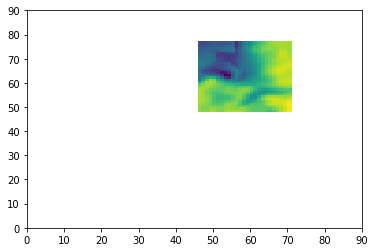

In [47]:
import matplotlib.pyplot as plt
plt.pcolor(G_total_tile8_box[1,1,:,:,8])

In [27]:
G_total_tile8 = final_dataset.G_total_tile8

In [35]:
# Assuming the array is already loaded and named 'xarray'
import numpy as np



# Use the xarray.sel() method to select the region based on the latitude and longitude values
selected_region = G_total_tile8.sel(i=slice(lat_min, lat_max), j=slice(lon_min, lon_max))

# 'selected_region' now contains the data for the specified latitude and longitude region within tile 8 of the array


In [36]:
selected_region

<xarray.DataArray 'G_total_tile8' (time: 731, k: 50, j: 0, i: 0)>
array([], shape=(731, 50, 0, 0), dtype=float32)
Coordinates:
  * i        (i) int32 
  * j        (j) int32 
  * k        (k) int32 0 1 2 3 4 5 6 7 8 9 10 ... 40 41 42 43 44 45 46 47 48 49
    tile     int32 8
  * time     (time) datetime64[ns] 2004-01-01T12:00:00 ... 2005-12-31T12:00:00

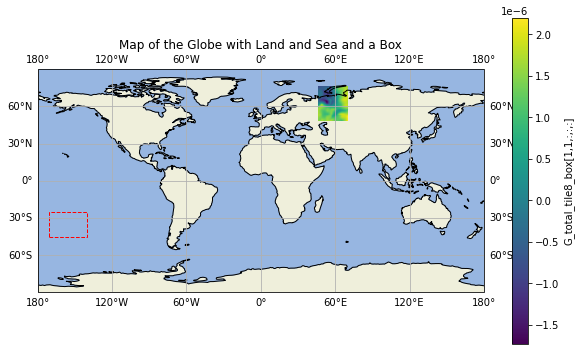

In [58]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def draw_box(box_lims, ax):
    # box_lims = [lat_max, lat_min, lon_max, lon_min]
    ax.add_patch(patches.Rectangle((box_lims[3], box_lims[1]), box_lims[2] - box_lims[3], box_lims[0] - box_lims[1],\
                       fill=False,
                       color="red",
                       linewidth=1,
                       linestyle='--'))

# Create a new map
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# Set the extent to cover the entire globe
ax.set_global()

# Add land and ocean features
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)

# Draw coastlines and gridlines
ax.coastlines()
ax.gridlines(draw_labels=True)

# Define the box limits
box_lims = [lat_max, lat_min, lon_max, lon_min]

# Draw the box
draw_box(box_lims, ax)

data = G_total_tile8_box[1, 1, :, :, 8]

# Add the data to the plot
im = ax.imshow(data, extent=(lon_min, lon_max, lat_min, lat_max), origin='lower', transform=ccrs.PlateCarree())

# Add a colorbar
cbar = fig.colorbar(im, ax=ax, orientation='vertical', pad=0.05)
cbar.set_label('G_total_tile8_box[1,1,:,:,:]')

plt.title('Map of the Globe with Land and Sea and a Box')
plt.show()


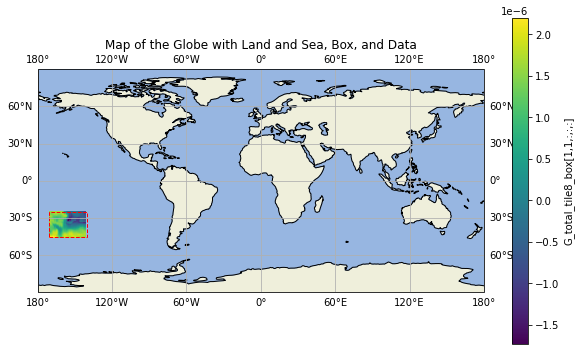

In [67]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import numpy as np

def draw_box(box_lims, ax):
    # box_lims = [lat_max, lat_min, lon_max, lon_min]
    ax.add_patch(patches.Rectangle((box_lims[3], box_lims[1]), box_lims[2] - box_lims[3], box_lims[0] - box_lims[1],\
                       fill=False,
                       color="red",
                       linewidth=1,
                       linestyle='--'))

# Create a new map
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# Set the extent to cover the entire globe
ax.set_global()

# Add land and ocean features
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)

# Draw coastlines and gridlines
ax.coastlines()
ax.gridlines(draw_labels=True)

# Define the box limits
box_lims = [lat_max, lat_min, lon_max, lon_min]

# Draw the box
draw_box(box_lims, ax)

# Assuming G_total_tile8_box[1,1,:,:,8] is a 2D array
# Replace this with the actual data and appropriate coordinates
XC = G_total_tile8_box[1, 1, :, :, 8].XC
YC = G_total_tile8_box[1, 1, :, :, 8].YC
# XC, YC = np.meshgrid(XC, YC)  # Assuming XC and YC are provided as arrays
data = G_total_tile8_box[1, 1, :, :, 8]

# Add the data to the plot
im = ax.pcolormesh(XC, YC, data, shading='auto', transform=ccrs.PlateCarree())

# Add a colorbar
cbar = fig.colorbar(im, ax=ax, orientation='vertical', pad=0.05)
cbar.set_label('G_total_tile8_box[1,1,:,:,:]')

plt.title('Map of the Globe with Land and Sea, Box, and Data')
plt.show()


### Compute the integral for X levels and save a single file for every terms (for all the years)

In [ ]:
# The deepest ocean bottom is set to 6145m below the surface, with the vertical grid spacing increasing 
# from 10m near the surface to 457m near the ocean bottom.

In [ ]:
if do_integral_tag:
    z_flag = 'zint'
    Z_depth = xr.open_dataset('/Users/jacoposala/Desktop/CU/3.RESEARCH/NASA_project/NEW_heatBudgetECCO/\
data/outputs/single_heat_terms/ECCOv4r4_Z_depth_1993_2017.nc').Z_depth

    expected_order = ('time', 'tile', 'k', 'j', 'i')

    varnames = ['G_total_cut', 'G_advection_cut', 'G_diffusion_cut', 'G_forcing_cut',
                'adv_hConv_cut', 'adv_vConv_cut', 'dif_hConv_cut', 'dif_vConv_cut',
                'G_advection_conv_zon_cut', 'G_advection_conv_mer_cut',
                'G_diffusion_conv_zon_cut', 'G_diffusion_conv_mer_cut', 
                'DATA_cut']
    
    for varname in varnames:
        print('Processing ', varname)
        print('Year being processed:')
        final_dataset = None  # Initialize final dataset for each variable

        for year in range(year_start, year_end):
            print(year)
            folder_year = str(year)
            load_path = os.path.join(integral_dir, 'single_heat_terms', folder_year)
            load_file_name = f'ECCOv4r4_{varname}_{year}.nc'
            load_file_path = os.path.join(load_path, load_file_name)
            dataset = xr.open_dataset(load_file_path)

            # Fix the order of coordinates for G_forcing_cut, adv_vConv_cut, and dif_vConv_cut
            if varname in ['G_forcing_cut', 'adv_vConv_cut', 'dif_vConv_cut']:
                dataset = dataset.transpose('time', 'k', 'tile', 'j', 'i')
            
            if varname == 'DATA_cut':
                # Conversion to Kelvin for DATA_cut
                variable_cut = dataset[varname] + 273.15
            else:
                variable_cut = dataset[varname]
                        
            depth_index_top_integral = 0  # corresponds to 5m
            depth_index_bottom_integral = 5  # corresponds to 55m

            thickness = np.abs(np.diff(Z_depth))

            selected_variable_cut = variable_cut[:, depth_index_top_integral:depth_index_bottom_integral, :, :, :]
            selected_thickness = thickness[depth_index_top_integral:depth_index_bottom_integral - 1]
            reshaped_thickness_diff = np.reshape(selected_thickness, (1, -1, 1, 1, 1))

            variable_integral = (
                (selected_variable_cut[:, :-1, :, :, :].values + selected_variable_cut[:, 1:, :, :, :].values)
                * reshaped_thickness_diff
            ).sum(axis=1) / 2

            # Save the integral to a new NetCDF file
            save_path = os.path.join(save_dir + '/nc_files_zlev_or_zint/')
            save_file_name = f'integral_{varname}_{year}.nc'
            save_file_path = os.path.join(save_path, save_file_name)
            
            # Modify variable name and add _ohc_k0k5
            varname_modified = varname.replace('_cut', '') + f'_ohc_k{depth_index_top_integral}_k{depth_index_bottom_integral}'
        
            integral_dataset = xr.Dataset(
                {
                    varname_modified: (["time", "tile", "j", "i"], variable_integral)
                },
                coords={
                    "time": variable_cut.time.values,
                    "tile": np.arange(13),  # Adjust the range according to the number of tiles
                    "j": np.arange(90),  # Adjust the range according to the latitude dimensions
                    "i": np.arange(90),  # Adjust the range according to the longitude dimensions
                }
            )
            # Save files for single years
            #integral_dataset.to_netcdf(save_file_path)

            if final_dataset is None:
                final_dataset = integral_dataset
            else:
                final_dataset = xr.concat([final_dataset, integral_dataset], dim='time')

        # At the end of all years, save the concatenated file, too
        if final_dataset is not None:
            # Save the final dataset to a single NetCDF file
            final_save_path = os.path.join(save_path, f'ECCOv4r4_{varname_modified}_{year_start}_{year_end}.nc')
            
            final_dataset.to_netcdf(final_save_path)


In [ ]:
ciao

In [26]:
forcing = xr.open_dataset('/Volumes/MyPassportForMac/MAC_15/NASA_project/2023/NEW_heatBudgetECCO_daily/data/outputs/single_heat_terms/2006/ECCOv4r4_G_forcing_cut_2006.nc')
forcing

<xarray.Dataset>
Dimensions:        (i: 90, j: 90, k: 10, tile: 13, time: 365)
Coordinates:
  * i              (i) int32 0 1 2 3 4 5 6 7 8 9 ... 81 82 83 84 85 86 87 88 89
  * j              (j) int32 0 1 2 3 4 5 6 7 8 9 ... 81 82 83 84 85 86 87 88 89
  * k              (k) int32 0 1 2 3 4 5 6 7 8 9
  * tile           (tile) int32 0 1 2 3 4 5 6 7 8 9 10 11 12
  * time           (time) datetime64[ns] 2006-01-01T12:00:00 ... 2006-12-31T1...
Data variables:
    G_forcing_cut  (time, tile, k, j, i) float64 ...

In [25]:
# data = xr.open_dataset('/Volumes/MyPassportForMac/MAC_15/NASA_project/2023/NEW_heatBudgetECCO_daily/data/outputs/single_heat_terms/2004/ECCOv4r4_DATA_cut_2004.nc')
# data


In [23]:
test = xr.open_dataset('/Users/jacoposala/Desktop/CU/3.RESEARCH/NASA_project/NEW_heatBudgetECCO/data/outputs/nc_files_zlev_or_zint/ECCOv4r4_G_diffusion_conv_mer_cut_zlev9_2004_2018.nc')
# test


In [24]:
test

<xarray.Dataset>
Dimensions:                   (i: 90, j: 90, tile: 13, time: 5113)
Coordinates:
  * i                         (i) int32 0 1 2 3 4 5 6 7 ... 83 84 85 86 87 88 89
  * j                         (j) int32 0 1 2 3 4 5 6 7 ... 83 84 85 86 87 88 89
    k                         int32 ...
  * tile                      (tile) int32 0 1 2 3 4 5 6 7 8 9 10 11 12
  * time                      (time) datetime64[ns] 2004-01-01T12:00:00 ... 2...
Data variables:
    G_diffusion_conv_mer_cut  (time, tile, j, i) float32 ...

In [20]:
test

<xarray.Dataset>
Dimensions:        (i: 90, j: 90, tile: 13, time: 5113)
Coordinates:
  * i              (i) int32 0 1 2 3 4 5 6 7 8 9 ... 81 82 83 84 85 86 87 88 89
  * j              (j) int32 0 1 2 3 4 5 6 7 8 9 ... 81 82 83 84 85 86 87 88 89
    k              int32 ...
  * tile           (tile) int32 0 1 2 3 4 5 6 7 8 9 10 11 12
  * time           (time) datetime64[ns] 2004-01-01T12:00:00 ... 2017-12-30T1...
Data variables:
    dif_vConv_cut  (time, tile, j, i) float32 ...